In [2]:
import pandas as pd
import numpy as np

In [3]:
link = pd.read_csv("links.csv")

In [4]:
link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [5]:
tag = pd.read_csv("tags.csv")
movies = pd.read_csv("movies.csv")
movies_crawling_sample = pd.read_csv("movies_crawling_sample.csv")
ratings = pd.read_csv("ratings.csv")

In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
tag

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [8]:
movies_crawling_sample

,Unnamed: 0,movieId,title,genres,storyline,country,language,director,release_year,runtime,age_rating,tag_1,tag_2,tag_3
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,A little boy named Andy loves to be in his roo...,United States,English,John Lasseter,1995.0,1 hour 21 minutes,All,toy,toy comes to life,rivalry
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,"Jumanji, one of the most unique--and dangerous...",United States,"English, French",Joe Johnston,1995.0,1 hour 44 minutes,All,board game,trapped in a game,adventurer
2,2,3,Grumpier Old Men (1995),Comedy|Romance,Things don't seem to change much in Wabasha Co...,United States,"English, Italian, German",Howard Deutch,1995.0,1 hour 41 minutes,15,sequel,boat,lake
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,This story based on the best selling novel by ...,United States,English,Forest Whitaker,1995.0,2 hours 4 minutes,18,black american,friendship between women,husband wife relationship
4,4,5,Father of the Bride Part II (1995),Comedy,"In this sequel to ""Father of the Bride"", Georg...",United States,English,Charles Shyer,1995.0,1 hour 46 minutes,All,fatherhood,doberman,dog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2495,3329,The Year My Voice Broke (1987),Drama|Romance,"In 1962, a prepubescent boy in rural Australia...",Australia,English,John Duigan,1987.0,1 hour 43 minutes,PG-13,watching tv,man wears a swimsuit,man wears underwear
1996,2496,3330,Splendor in the Grass (1961),Drama|Romance,It's 1928 in oil rich southeast Kansas. High s...,United States,English,Elia Kazan,1961.0,2 hours 4 minutes,12,melodrama,high school football,the future
1997,2497,3331,My Tutor (1983),Drama,High school senior Bobby Chrystal fails his Fr...,United States,English,George Bowers,1983.0,1 hour 37 minutes,18,sex with teacher,sex scene,female nudity
1998,2498,3334,Key Largo (1948),Crime|Drama|Film-Noir|Thriller,Frank McCloud travels to a run-down hotel on K...,United States,"English, Italian",John Huston,1948.0,1 hour 40 minutes,15,florida noir,gangster,widow


#전처리

##행 제거

In [9]:
movies_crawling_sample = movies_crawling_sample.drop(columns=['Unnamed: 0'])

##장르 구분자 변경

In [10]:
movies_crawling_sample[movies_crawling_sample['genres'].str.contains(' ')]

,movieId,title,genres,storyline,country,language,director,release_year,runtime,age_rating,tag_1,tag_2,tag_3


In [11]:
movies_crawling_sample['genres'] = movies_crawling_sample['genres'].str.replace('|',' ', regex=True)
movies_crawling_sample

,movieId,title,genres,storyline,country,language,director,release_year,runtime,age_rating,tag_1,tag_2,tag_3
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,A little boy named Andy loves to be in his roo...,United States,English,John Lasseter,1995.0,1 hour 21 minutes,All,toy,toy comes to life,rivalry
1,2,Jumanji (1995),Adventure Children Fantasy,"Jumanji, one of the most unique--and dangerous...",United States,"English, French",Joe Johnston,1995.0,1 hour 44 minutes,All,board game,trapped in a game,adventurer
2,3,Grumpier Old Men (1995),Comedy Romance,Things don't seem to change much in Wabasha Co...,United States,"English, Italian, German",Howard Deutch,1995.0,1 hour 41 minutes,15,sequel,boat,lake
3,4,Waiting to Exhale (1995),Comedy Drama Romance,This story based on the best selling novel by ...,United States,English,Forest Whitaker,1995.0,2 hours 4 minutes,18,black american,friendship between women,husband wife relationship
4,5,Father of the Bride Part II (1995),Comedy,"In this sequel to ""Father of the Bride"", Georg...",United States,English,Charles Shyer,1995.0,1 hour 46 minutes,All,fatherhood,doberman,dog
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3329,The Year My Voice Broke (1987),Drama Romance,"In 1962, a prepubescent boy in rural Australia...",Australia,English,John Duigan,1987.0,1 hour 43 minutes,PG-13,watching tv,man wears a swimsuit,man wears underwear
1996,3330,Splendor in the Grass (1961),Drama Romance,It's 1928 in oil rich southeast Kansas. High s...,United States,English,Elia Kazan,1961.0,2 hours 4 minutes,12,melodrama,high school football,the future
1997,3331,My Tutor (1983),Drama,High school senior Bobby Chrystal fails his Fr...,United States,English,George Bowers,1983.0,1 hour 37 minutes,18,sex with teacher,sex scene,female nudity
1998,3334,Key Largo (1948),Crime Drama Film-Noir Thriller,Frank McCloud travels to a run-down hotel on K...,United States,"English, Italian",John Huston,1948.0,1 hour 40 minutes,15,florida noir,gangster,widow


## title 연도 구분

In [12]:
movies_crawling_sample[['title', 'year']] = movies_crawling_sample['title'].str.rsplit(' ', n=1, expand=True)
movies_crawling_sample

,movieId,title,genres,storyline,country,language,director,release_year,runtime,age_rating,tag_1,tag_2,tag_3,year
0,1,Toy Story,Adventure Animation Children Comedy Fantasy,A little boy named Andy loves to be in his roo...,United States,English,John Lasseter,1995.0,1 hour 21 minutes,All,toy,toy comes to life,rivalry,(1995)
1,2,Jumanji,Adventure Children Fantasy,"Jumanji, one of the most unique--and dangerous...",United States,"English, French",Joe Johnston,1995.0,1 hour 44 minutes,All,board game,trapped in a game,adventurer,(1995)
2,3,Grumpier Old Men,Comedy Romance,Things don't seem to change much in Wabasha Co...,United States,"English, Italian, German",Howard Deutch,1995.0,1 hour 41 minutes,15,sequel,boat,lake,(1995)
3,4,Waiting to Exhale,Comedy Drama Romance,This story based on the best selling novel by ...,United States,English,Forest Whitaker,1995.0,2 hours 4 minutes,18,black american,friendship between women,husband wife relationship,(1995)
4,5,Father of the Bride Part II,Comedy,"In this sequel to ""Father of the Bride"", Georg...",United States,English,Charles Shyer,1995.0,1 hour 46 minutes,All,fatherhood,doberman,dog,(1995)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3329,The Year My Voice Broke,Drama Romance,"In 1962, a prepubescent boy in rural Australia...",Australia,English,John Duigan,1987.0,1 hour 43 minutes,PG-13,watching tv,man wears a swimsuit,man wears underwear,(1987)
1996,3330,Splendor in the Grass,Drama Romance,It's 1928 in oil rich southeast Kansas. High s...,United States,English,Elia Kazan,1961.0,2 hours 4 minutes,12,melodrama,high school football,the future,(1961)
1997,3331,My Tutor,Drama,High school senior Bobby Chrystal fails his Fr...,United States,English,George Bowers,1983.0,1 hour 37 minutes,18,sex with teacher,sex scene,female nudity,(1983)
1998,3334,Key Largo,Crime Drama Film-Noir Thriller,Frank McCloud travels to a run-down hotel on K...,United States,"English, Italian",John Huston,1948.0,1 hour 40 minutes,15,florida noir,gangster,widow,(1948)


In [13]:
movies_crawling_sample['year'] = movies_crawling_sample['year'].apply(lambda x: x[1:-1])
movies_crawling_sample['year'] = movies_crawling_sample['year'].astype(int)
movies_crawling_sample

,movieId,title,genres,storyline,country,language,director,release_year,runtime,age_rating,tag_1,tag_2,tag_3,year
0,1,Toy Story,Adventure Animation Children Comedy Fantasy,A little boy named Andy loves to be in his roo...,United States,English,John Lasseter,1995.0,1 hour 21 minutes,All,toy,toy comes to life,rivalry,1995
1,2,Jumanji,Adventure Children Fantasy,"Jumanji, one of the most unique--and dangerous...",United States,"English, French",Joe Johnston,1995.0,1 hour 44 minutes,All,board game,trapped in a game,adventurer,1995
2,3,Grumpier Old Men,Comedy Romance,Things don't seem to change much in Wabasha Co...,United States,"English, Italian, German",Howard Deutch,1995.0,1 hour 41 minutes,15,sequel,boat,lake,1995
3,4,Waiting to Exhale,Comedy Drama Romance,This story based on the best selling novel by ...,United States,English,Forest Whitaker,1995.0,2 hours 4 minutes,18,black american,friendship between women,husband wife relationship,1995
4,5,Father of the Bride Part II,Comedy,"In this sequel to ""Father of the Bride"", Georg...",United States,English,Charles Shyer,1995.0,1 hour 46 minutes,All,fatherhood,doberman,dog,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3329,The Year My Voice Broke,Drama Romance,"In 1962, a prepubescent boy in rural Australia...",Australia,English,John Duigan,1987.0,1 hour 43 minutes,PG-13,watching tv,man wears a swimsuit,man wears underwear,1987
1996,3330,Splendor in the Grass,Drama Romance,It's 1928 in oil rich southeast Kansas. High s...,United States,English,Elia Kazan,1961.0,2 hours 4 minutes,12,melodrama,high school football,the future,1961
1997,3331,My Tutor,Drama,High school senior Bobby Chrystal fails his Fr...,United States,English,George Bowers,1983.0,1 hour 37 minutes,18,sex with teacher,sex scene,female nudity,1983
1998,3334,Key Largo,Crime Drama Film-Noir Thriller,Frank McCloud travels to a run-down hotel on K...,United States,"English, Italian",John Huston,1948.0,1 hour 40 minutes,15,florida noir,gangster,widow,1948


##ratings 추가


In [14]:
df = pd.merge(ratings, movies_crawling_sample, on='movieId', how='left')
df

,userId,movieId,rating,timestamp,title,genres,storyline,country,language,director,release_year,runtime,age_rating,tag_1,tag_2,tag_3,year
0,1,1,4.0,964982703,Toy Story,Adventure Animation Children Comedy Fantasy,A little boy named Andy loves to be in his roo...,United States,English,John Lasseter,1995.0,1 hour 21 minutes,All,toy,toy comes to life,rivalry,1995.0
1,1,3,4.0,964981247,Grumpier Old Men,Comedy Romance,Things don't seem to change much in Wabasha Co...,United States,"English, Italian, German",Howard Deutch,1995.0,1 hour 41 minutes,15,sequel,boat,lake,1995.0
2,1,6,4.0,964982224,Heat,Action Crime Thriller,Hunters and their prey--Neil and his professio...,United States,"English, Spanish",Michael Mann,1995.0,2 hours 50 minutes,18,gun battle,armored car robbery,gunfight,1995.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en),Mystery Thriller,A film about two homicide detectives' (Morgan ...,United States,English,David Fincher,1995.0,2 hours 7 minutes,18,serial killer,detective,murder,1995.0
4,1,50,5.0,964982931,"Usual Suspects, The",Crime Mystery Thriller,"Following a truck hijack in New York, five cri...",United States,"English, Hungarian, Spanish, French",Bryan Singer,1995.0,1 hour 46 minutes,18,surprise ending,criminal mastermind,criminal,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100832,610,168248,5.0,1493850091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100833,610,168250,5.0,1494273047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100834,610,168252,5.0,1493846352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


밑에 있는 코드는 샘플이라 결측치 제거

In [15]:
df = df.dropna()

In [16]:
df

,userId,movieId,rating,timestamp,title,genres,storyline,country,language,director,release_year,runtime,age_rating,tag_1,tag_2,tag_3,year
0,1,1,4.0,964982703,Toy Story,Adventure Animation Children Comedy Fantasy,A little boy named Andy loves to be in his roo...,United States,English,John Lasseter,1995.0,1 hour 21 minutes,All,toy,toy comes to life,rivalry,1995.0
1,1,3,4.0,964981247,Grumpier Old Men,Comedy Romance,Things don't seem to change much in Wabasha Co...,United States,"English, Italian, German",Howard Deutch,1995.0,1 hour 41 minutes,15,sequel,boat,lake,1995.0
2,1,6,4.0,964982224,Heat,Action Crime Thriller,Hunters and their prey--Neil and his professio...,United States,"English, Spanish",Michael Mann,1995.0,2 hours 50 minutes,18,gun battle,armored car robbery,gunfight,1995.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en),Mystery Thriller,A film about two homicide detectives' (Morgan ...,United States,English,David Fincher,1995.0,2 hours 7 minutes,18,serial killer,detective,murder,1995.0
4,1,50,5.0,964982931,"Usual Suspects, The",Crime Mystery Thriller,"Following a truck hijack in New York, five cri...",United States,"English, Hungarian, Spanish, French",Bryan Singer,1995.0,1 hour 46 minutes,18,surprise ending,criminal mastermind,criminal,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99714,610,3273,3.0,1493848104,Scream 3,Comedy Horror Mystery Thriller,"A new film is currently in production, and a k...",United States,English,Wes Craven,2000.0,1 hour 56 minutes,18,masked killer,serial killer,mystery killer,2000.0
99715,610,3285,3.5,1479542089,"Beach, The",Adventure Drama,Garland's novel centers on a young nicotine-ad...,United Kingdom,"English, French, Swedish, Thai, Serbian",Danny Boyle,2000.0,1 hour 59 minutes,18,thailand,travel,beach,2000.0
99716,610,3298,4.0,1493845268,Boiler Room,Crime Drama Thriller,Seth Davis is a college dropout running an ill...,United States,"English, Russian",Ben Younger,2000.0,2 hours,15,financial fraud,stock trader,securities fraud,2000.0
99717,610,3300,4.0,1493845462,Pitch Black,Horror Sci-Fi Thriller,"The space transport vessel ""Hunter-Gratzner"" c...",United States,"English, Arabic",David Twohy,2000.0,1 hour 49 minutes,18,darkness,desert,gun,2000.0


#ITEM + RATINGS with fillna(0)

##itme_user 유사도 행렬 준비

In [17]:
movie_user = df.pivot_table(values='rating', index='title', columns='userId')
movie_user

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'night Mother,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
101 Dalmatians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zero Effect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zone 39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
movie_user_tmp = movie_user.copy().fillna(0)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

movie_similarity_matrix = cosine_similarity(movie_user_tmp)
movie_similarity_matrix.shape

(1696, 1696)

##유사도 계산

In [20]:
movie_titles = movie_user.index
movie_titles

Index([''burbs, The', ''night Mother', '10 Things I Hate About You',
       '101 Dalmatians', '101 Dalmatians (One Hundred and One Dalmatians)',
       '13th Warrior, The', '187 (One Eight Seven)',
       '1984 (Nineteen Eighty-Four)', '20 Dates', '200 Cigarettes',
       ...
       'Young Guns II', 'Young Poisoner's Handbook, The',
       'Young Sherlock Holmes', 'Your Friends and Neighbors',
       'Zed & Two Noughts, A', 'Zero Effect', 'Zeus and Roxanne', 'Zone 39',
       'eXistenZ', '¡Three Amigos!'],
      dtype='object', name='title', length=1696)

In [21]:
# 영화-영화 유저관람 내역에 대한 유사도
movie_similarity = pd.DataFrame(movie_similarity_matrix,
                                index=movie_titles, columns=movie_titles)
print(movie_similarity.shape)
movie_similarity.head()

(1696, 1696)


title,"'burbs, The",'night Mother,10 Things I Hate About You,101 Dalmatians,101 Dalmatians (One Hundred and One Dalmatians),"13th Warrior, The",187 (One Eight Seven),1984 (Nineteen Eighty-Four),20 Dates,200 Cigarettes,...,Young Guns II,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Your Friends and Neighbors,"Zed & Two Noughts, A",Zero Effect,Zeus and Roxanne,Zone 39,eXistenZ,¡Three Amigos!
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The",1.000000,0.071429,0.180401,0.125357,0.254537,0.201098,0.165643,0.203289,0.123718,0.242977,...,0.105657,0.0,0.272545,0.000000,0.000000,0.155553,0.142857,0.142857,0.211467,0.372876
'night Mother,0.071429,1.000000,0.092513,0.091168,0.171736,0.063986,0.000000,0.000000,0.000000,0.000000,...,0.184900,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.216295,0.180009
10 Things I Hate About You,0.180401,0.092513,1.000000,0.282549,0.270490,0.258683,0.120922,0.167080,0.038457,0.172503,...,0.078686,0.0,0.121497,0.088813,0.108860,0.169472,0.111016,0.111016,0.167085,0.160426
101 Dalmatians,0.125357,0.091168,0.282549,1.000000,0.335155,0.056147,0.000000,0.096901,0.063163,0.137834,...,0.037928,0.0,0.097079,0.145870,0.178796,0.132848,0.000000,0.000000,0.094899,0.127186
101 Dalmatians (One Hundred and One Dalmatians),0.254537,0.171736,0.270490,0.335155,1.000000,0.179939,0.072410,0.054308,0.059491,0.086547,...,0.079385,0.0,0.140961,0.000000,0.000000,0.087999,0.000000,0.000000,0.130010,0.213821


##평점예측

In [22]:
from tqdm.notebook import tqdm

def modeling(similarity_matrix, data):
    df_pred_all = pd.DataFrame()
    titles = similarity_matrix.index
    all_users = sorted(data['userId'].unique())
    n_titles = len(titles)

    for user in tqdm(all_users):
        idx = data[data['userId'] == user].index

        # 유사도
        watched_movies = data.loc[idx, 'title'].tolist()
        sub_sim_mat = similarity_matrix.loc[watched_movies]
        sub_sim_mat = sub_sim_mat.T.to_numpy()
        sim_N = np.sum(sub_sim_mat, axis=1) + 1


        # 평점 예측
        watched_movies_y = data.loc[idx, 'rating']
        watched_movies_y = np.array(watched_movies_y.tolist()).reshape(-1, 1)

        pred_y = np.matmul(sub_sim_mat, watched_movies_y).flatten() / sim_N

        users_list = [user] * n_titles
        cur_pred = pd.DataFrame(zip(users_list, titles, pred_y),
                                columns=['userId', 'title', 'pred_rating'])

        # 결과 기록
        df_pred_all = pd.concat([df_pred_all, cur_pred], axis=0)
    return df_pred_all

In [23]:
df_pred_all = modeling(movie_similarity, df)
df_pred_all

  0%|          | 0/608 [00:00<?, ?it/s]

,userId,title,pred_rating
0,1,"'burbs, The",4.128709
1,1,'night Mother,3.988062
2,1,10 Things I Hate About You,4.169523
3,1,101 Dalmatians,4.132060
4,1,101 Dalmatians (One Hundred and One Dalmatians),4.221425
...,...,...,...
1691,610,Zero Effect,4.004900
1692,610,Zeus and Roxanne,3.717793
1693,610,Zone 39,3.717793
1694,610,eXistenZ,3.958392


###평점 분포 시각화

In [31]:
data_pred = df_pred_all

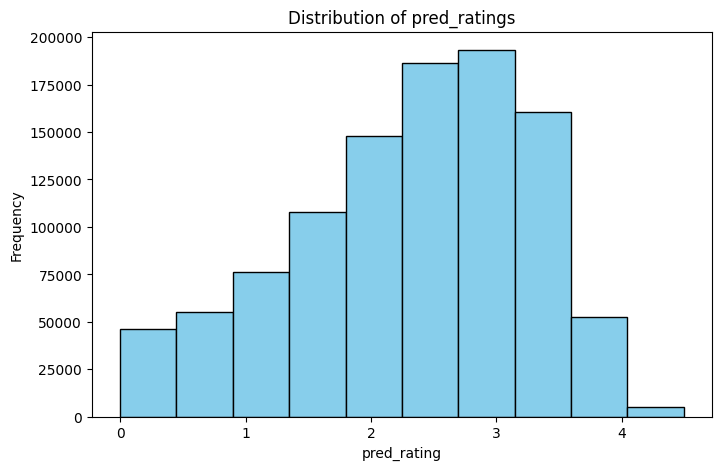

In [32]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.DataFrame(data_pred)

# 히스토그램
plt.figure(figsize=(8, 5))
plt.hist(df['pred_rating'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of pred_ratings')
plt.xlabel('pred_rating')
plt.ylabel('Frequency')
plt.show()

#ITEM + RATINGS with KNN

##결측치 knn으로 채우기

In [24]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.metrics.pairwise import cosine_similarity


# 0 값을 NaN으로 변경
movie_user_tmp.replace(0, np.nan, inplace=True)

def knn_impute(movie_user_tmp, k_neighbors=20):
    # KNN Imputer 초기화
    imputer = KNNImputer(n_neighbors=k_neighbors)

    # KNN Imputer를 사용하여 NaN 값을 채움
    movie_user_imputed = imputer.fit_transform(movie_user_tmp)

    # 채워진 데이터를 DataFrame으로 변환
    movie_user_imputed_df = pd.DataFrame(movie_user_imputed, columns=movie_user_tmp.columns)

    return movie_user_imputed_df

# KNN을 사용하여 5개의 이웃을 기반으로 NaN 값을 채움
movie_user_imputed = knn_impute(movie_user_tmp, k_neighbors=5)

# 채워진 데이터를 출력
movie_user_imputed


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,4.2,4.5,1.7,2.8,3.4,3.8,3.7,2.8,2.6,2.9,...,4.1,2.8,3.4,3.4,3.3,3.8,3.4,2.8,3.2,3.7
1,4.2,4.5,0.5,3.0,3.8,4.2,3.1,3.4,3.6,2.5,...,4.3,3.8,4.0,3.8,3.8,3.5,3.8,3.3,3.0,4.2
2,4.6,4.5,2.1,3.2,3.4,3.4,4.2,3.0,3.0,2.9,...,4.1,3.6,3.0,3.4,5.0,3.2,4.6,2.9,3.0,3.1
3,4.6,4.5,1.7,3.8,3.6,3.4,3.8,3.4,2.6,2.9,...,4.0,3.4,4.0,3.2,3.0,3.4,3.4,2.4,3.0,4.0
4,4.8,4.5,1.7,3.8,3.8,3.4,3.3,3.6,3.4,2.9,...,4.0,3.4,4.0,3.0,3.5,3.8,3.8,2.6,3.0,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,4.6,4.5,0.5,3.8,3.8,3.8,3.8,4.0,3.4,2.9,...,4.3,3.0,5.0,3.2,3.2,3.3,4.2,3.0,3.2,4.2
1692,4.2,4.5,1.3,3.2,3.4,2.8,3.8,3.0,3.2,2.3,...,4.0,2.4,2.2,3.6,2.9,3.1,3.2,1.5,3.2,3.6
1693,4.2,4.5,1.3,3.2,3.4,3.4,3.8,3.8,3.0,2.3,...,4.0,3.4,3.0,3.2,3.5,2.9,3.2,2.4,3.2,3.6
1694,4.4,4.5,2.0,3.8,3.8,3.6,3.3,3.4,3.4,2.5,...,4.5,3.0,5.0,3.6,3.5,4.1,3.8,4.5,3.2,4.0


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

movie_similarity_knn = cosine_similarity(movie_user_imputed)
movie_similarity_knn.shape

(1696, 1696)

In [26]:
movie_titles = movie_user.index
movie_titles

Index([''burbs, The', ''night Mother', '10 Things I Hate About You',
       '101 Dalmatians', '101 Dalmatians (One Hundred and One Dalmatians)',
       '13th Warrior, The', '187 (One Eight Seven)',
       '1984 (Nineteen Eighty-Four)', '20 Dates', '200 Cigarettes',
       ...
       'Young Guns II', 'Young Poisoner's Handbook, The',
       'Young Sherlock Holmes', 'Your Friends and Neighbors',
       'Zed & Two Noughts, A', 'Zero Effect', 'Zeus and Roxanne', 'Zone 39',
       'eXistenZ', '¡Three Amigos!'],
      dtype='object', name='title', length=1696)

In [27]:
# 영화-영화 유저관람 내역에 대한 유사도
movie_similarity_knn = pd.DataFrame(movie_similarity_knn,
                                index=movie_titles, columns=movie_titles)
print(movie_similarity_knn.shape)
movie_similarity_knn.head()

(1696, 1696)


title,"'burbs, The",'night Mother,10 Things I Hate About You,101 Dalmatians,101 Dalmatians (One Hundred and One Dalmatians),"13th Warrior, The",187 (One Eight Seven),1984 (Nineteen Eighty-Four),20 Dates,200 Cigarettes,...,Young Guns II,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Your Friends and Neighbors,"Zed & Two Noughts, A",Zero Effect,Zeus and Roxanne,Zone 39,eXistenZ,¡Three Amigos!
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The",1.000000,0.988006,0.987373,0.988541,0.986655,0.990873,0.990343,0.988438,0.986872,0.989591,...,0.991105,0.988786,0.987682,0.987049,0.984402,0.987335,0.988712,0.990184,0.986266,0.988079
'night Mother,0.988006,1.000000,0.988826,0.987672,0.988781,0.987117,0.989648,0.990250,0.989258,0.990882,...,0.988811,0.992459,0.990976,0.991946,0.991512,0.990663,0.987087,0.990230,0.989132,0.989347
10 Things I Hate About You,0.987373,0.988826,1.000000,0.987392,0.989312,0.987912,0.988463,0.989596,0.988709,0.989925,...,0.987483,0.990046,0.990344,0.987902,0.986730,0.988779,0.985547,0.988306,0.987862,0.989119
101 Dalmatians,0.988541,0.987672,0.987392,1.000000,0.989069,0.989490,0.988060,0.989060,0.986439,0.988865,...,0.987476,0.989292,0.988413,0.988455,0.987031,0.988158,0.986444,0.988816,0.987526,0.988225
101 Dalmatians (One Hundred and One Dalmatians),0.986655,0.988781,0.989312,0.989069,1.000000,0.985662,0.986326,0.988721,0.988199,0.990765,...,0.986123,0.989706,0.991432,0.989442,0.988072,0.991879,0.984520,0.986751,0.990049,0.987564


##평점 예측

In [28]:
df_pred_all_knn = modeling(movie_similarity_knn, df)
df_pred_all_knn

  0%|          | 0/608 [00:00<?, ?it/s]

,userId,title,pred_rating
0,1,"'burbs, The",4.288172
1,1,'night Mother,4.288803
2,1,10 Things I Hate About You,4.288403
3,1,101 Dalmatians,4.288291
4,1,101 Dalmatians (One Hundred and One Dalmatians),4.289092
...,...,...,...
1691,610,Zero Effect,4.058264
1692,610,Zeus and Roxanne,4.055633
1693,610,Zone 39,4.055944
1694,610,eXistenZ,4.058156


###평점 분포 시각화

In [29]:
data = df_pred_all_knn

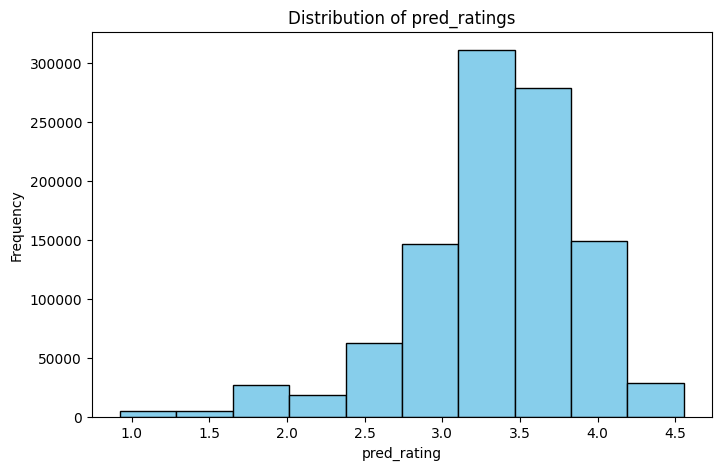

In [33]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.DataFrame(data)

# 히스토그램
plt.figure(figsize=(8, 5))
plt.hist(df['pred_rating'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of pred_ratings')
plt.xlabel('pred_rating')
plt.ylabel('Frequency')
plt.show()


#SGD

In [ ]:
import numpy as np
import pandas as pd

class MatrixFactorization:
    def __init__(self, R, K, learning_rate, reg_param, epochs):
        """
        :param R: 사용자-아이템 평점 행렬 (데이터프레임)
        :param K: 잠재 요인의 차원
        :param learning_rate: 학습률
        :param reg_param: 정규화 파라미터
        :param epochs: 반복 횟수
        """
        self.R = R.values  # 데이터프레임을 numpy 배열로 변환
        self.num_users, self.num_items = self.R.shape
        self.K = K
        self.learning_rate = learning_rate
        self.reg_param = reg_param
        self.epochs = epochs

        # 잠재 요인 행렬 초기화
        self.P = np.random.normal(scale=1.0 / self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1.0 / self.K, size=(self.num_items, self.K))

    def train(self):
        for epoch in range(self.epochs):
            for i in range(self.num_users):
                for j in range(self.num_items):
                    if self.R[i][j] > 0:
                        eij = self.R[i][j] - np.dot(self.P[i, :], self.Q[j, :].T)
                        for k in range(self.K):
                            self.P[i][k] += self.learning_rate * (2 * eij * self.Q[j][k] - self.reg_param * self.P[i][k])
                            self.Q[j][k] += self.learning_rate * (2 * eij * self.P[i][k] - self.reg_param * self.Q[j][k])

            # 예측값을 특정 범위로 클리핑
            self.P = np.clip(self.P, 0, 5)
            self.Q = np.clip(self.Q, 0, 5)

            # 오차 계산
            error = self.calculate_error()
            print(f"Epoch {epoch + 1}/{self.epochs}, Error: {error}")

    def calculate_error(self):
        """
        모델의 현재 오차 계산
        """
        error = 0
        for i in range(self.num_users):
            for j in range(self.num_items):
                if self.R[i][j] > 0:
                    error += (self.R[i][j] - np.dot(self.P[i, :], self.Q[j, :].T))**2
                    for k in range(self.K):
                        error += (self.reg_param / 2) * (self.P[i][k]**2 + self.Q[j][k]**2)
        return error

    def predict(self):
        """
        학습된 모델을 사용하여 전체 사용자-아이템 평점 행렬 예측
        """
        return np.dot(self.P, self.Q.T)




# 잠재 요인의 차원, 학습률, 정규화 파라미터, 반복 횟수 등을 설정
K = 2
learning_rate = 0.01
reg_param = 0.02
epochs = 100

# 모델 생성 및 학습
mf = MatrixFactorization(movie_user_tmp, K, learning_rate, reg_param, epochs)
mf.train()

# 예측 결과 출력
predicted_R = mf.predict()
predicted_R = np.clip(predicted_R, 0, 5)
print("예측 평점 행렬:")
print(predicted_R)



Epoch 1/100, Error: 336106.7013304758
Epoch 2/100, Error: 92045.00076159529
Epoch 3/100, Error: 33041.50019693136
Epoch 4/100, Error: 27918.24135697923
Epoch 5/100, Error: 25959.01447092297
Epoch 6/100, Error: 25004.338054891545
Epoch 7/100, Error: 24464.49930614257
Epoch 8/100, Error: 24118.1642203683
Epoch 9/100, Error: 23872.305577159586
Epoch 10/100, Error: 23684.64794778088
Epoch 11/100, Error: 23535.396736536866
Epoch 12/100, Error: 23411.07311492494
Epoch 13/100, Error: 23305.11502826328
Epoch 14/100, Error: 23210.888243130128
Epoch 15/100, Error: 23125.396414968654
Epoch 16/100, Error: 23047.05303325377


In [35]:
data_f = pd.DataFrame(predicted_R)

In [36]:
data_f

,0,1,2,3,4,5,6,7,8,9,...,598,599,600,601,602,603,604,605,606,607
0,4.124447,3.542661,2.431896,2.885486,3.441452,3.712896,3.309754,3.271507,2.780277,2.431896,...,3.612785,3.556885,3.917824,3.617732,3.358003,3.197469,3.319125,3.021505,3.043527,3.656644
1,3.551481,3.186746,2.192653,2.700694,3.076973,3.152226,2.850240,3.004345,2.582855,2.192653,...,3.237274,3.099981,3.856960,3.080940,2.886382,2.917918,2.933853,2.685990,2.650814,3.387949
2,4.505087,3.821060,2.621196,3.074786,3.718572,4.071547,3.615109,3.506676,2.969577,2.621196,...,3.901167,3.871881,4.107124,3.963802,3.669737,3.433885,3.598423,3.270338,3.313686,3.908835
3,3.840145,3.334724,2.290507,2.744097,3.234469,3.445018,3.081683,3.095858,2.638888,2.290507,...,3.397391,3.321612,3.776435,3.359250,3.125168,3.020888,3.110517,2.835651,2.841744,3.468280
4,4.034097,3.805292,2.624864,3.361886,3.649798,3.519482,3.237938,3.667663,3.190936,2.624864,...,3.849269,3.571917,5.039294,3.453021,3.271634,3.538617,3.435777,3.165684,3.052012,4.174159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,4.674937,4.375290,3.016874,3.841233,4.200823,4.089935,3.752234,4.202862,3.650025,3.016874,...,4.428748,4.129914,5.717414,4.010218,3.792651,4.059058,3.962372,3.647243,3.529222,4.776659
1692,3.256001,2.907482,2.000000,2.453590,2.809189,2.894618,2.613074,2.734959,2.348381,2.000000,...,2.954829,2.838205,3.485928,2.828157,2.646770,2.658074,2.681896,2.453782,2.427147,3.081257
1693,3.266571,2.918596,2.007705,2.464211,2.819705,2.903464,2.621561,2.746140,2.358326,2.007705,...,2.965975,2.847877,3.503186,2.836919,2.655300,2.668727,2.691534,2.462783,2.435397,3.094201
1694,4.524364,4.165968,2.870201,3.609030,4.008479,3.980737,3.631242,3.973444,3.437661,2.870201,...,4.222652,3.978209,5.290552,3.898236,3.673070,3.845656,3.796681,3.487479,3.400442,4.502665


In [37]:
import pandas as pd

data_sgd = data_f

df_original = pd.DataFrame(data_sgd)

# '아이템', '사용자', '평점' 열로 구성된 데이터프레임 생성
df_long = df_original.stack().reset_index()
df_long.columns = ['사용자', '아이템', '평점']

# 결과 출력
print(df_long)


          사용자  아이템        평점
0           0    0  4.124447
1           0    1  3.542661
2           0    2  2.431896
3           0    3  2.885486
4           0    4  3.441452
...       ...  ...       ...
1031163  1695  603  3.180895
1031164  1695  604  3.299546
1031165  1695  605  3.004061
1031166  1695  606  3.024588
1031167  1695  607  3.638964

[1031168 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


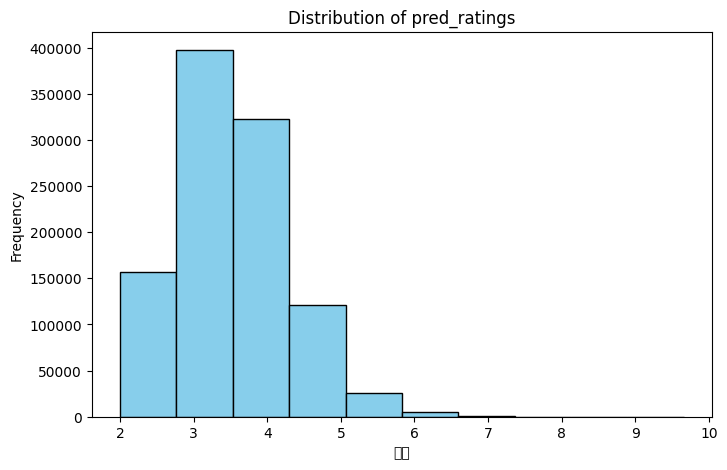

In [38]:
import matplotlib.pyplot as plt
import pandas as pd




# 히스토그램
plt.figure(figsize=(8, 5))
plt.hist(df_long['평점'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of pred_ratings')
plt.xlabel('평점')
plt.ylabel('Frequency')
plt.show()


#ITEM + STORYLINE

##Item_storyline 유사도 행렬 준비